In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [96]:
def model_concentration(t, q_in, q_out, v):
    # returns the result in g/l
    return q_in/q_out + (2.4*10**-3 - q_in/q_out)*np.exp(-q_out*t/v)

In [97]:
chamber_volumes = np.array([4771.3, 9542.6, 23448.5, 268056]) # ml
flow_rates = np.array([-50, 500, 5000, 50000]) # flow-rates mg/h
time_measure = 600 # seconds
time_arr = np.arange(0, time_measure)


chamber_volumes = chamber_volumes/1000


n_cham = len(chamber_volumes)
# 2 lpm
q_o = 2/60
fl_gs = flow_rates*(3.6*10**-6)

n_fr = fl_gs.shape[0]
# matrix results
rc = np.zeros((n_fr, time_measure, n_cham))

for index in range(n_fr):
    for subindex in range(n_cham):
        rc[index,:, subindex] = model_concentration(time_arr, fl_gs[index], q_o, chamber_volumes[subindex])*1000


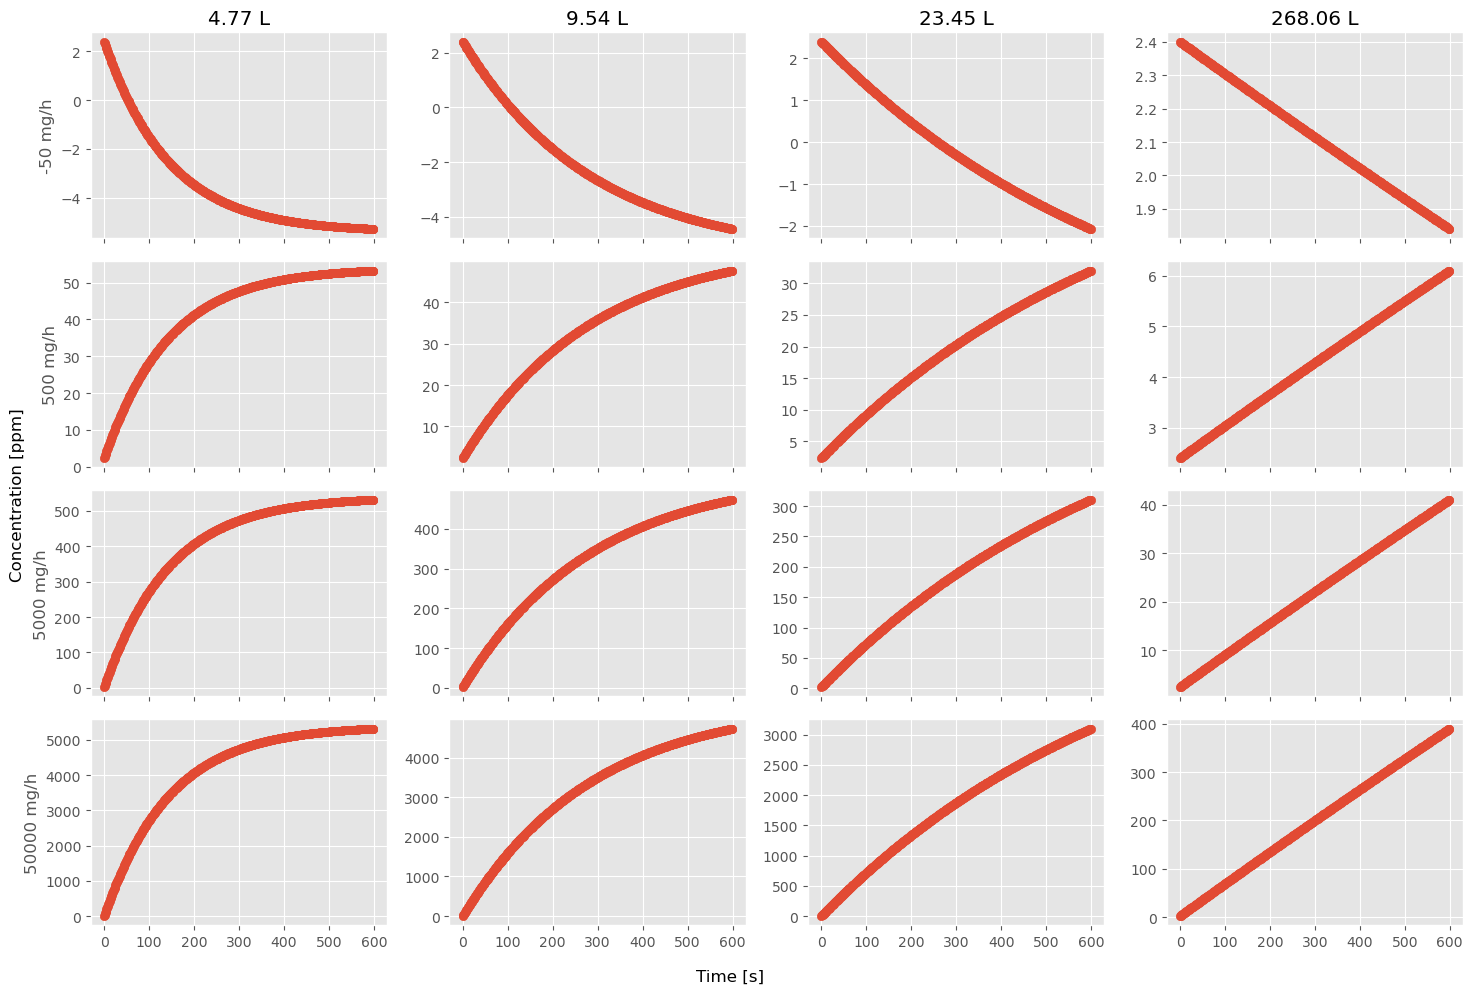

In [98]:
f, ax_ls = plt.subplots(ncols=n_fr, nrows=n_cham, figsize=(15, 10), sharex=True)

for index in range(n_fr):
    for subindex in range(n_cham):
        ax_ls[index, subindex].scatter(time_arr,  rc[index,:, subindex])
        ax_ls[index, 0].set_ylabel(f"{flow_rates[index]} mg/h")
        ax_ls[0, subindex].set_title(f"{chamber_volumes[subindex]:.2f} L")

f.supxlabel("Time [s]")
f.supylabel( "Concentration [ppm]")
plt.tight_layout()

